<h1>
  Going Pro with Artificial Brains - Deep Q-Learning

# Predicting house prices

What we want to do is predict how much a certain house might cost, based on some variables. In order to do so you need to follow these four steps:

* **1** Get some historical data on house sales; for this example, you'll use a dataset of about 20,000 houses in Seattle.
* **2** Import this data to your code while applying some scaling to your variables (I'll explain scaling to you as we go).
* **3** Build an Artificial Neural Network using any library—you'll use Keras, as it is simple and reliable.
* **4** Train your ANN and get the results.

# Install libraries
```
conda install tensorflow
conda install pandas
conda install scikit-learn
```

# Importing libraries
Every time you start coding something you ought to begin by importing the necessary libraries. Therefore, we start our code with these lines:

```
# Importing the libraries
import pandas as pd
import numpy as np
import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.optimizers import Adam
```

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.optimizers import Adam

# Importing the dataset

Now that you have imported your libraries you can read the dataset. Do it by using the Pandas library you imported before, with this one line:
```
dataset = pd.read_csv('kc_house_data.csv')
```

In [2]:
caminho = 'kc_house_data.csv'
dataset = pd.read_csv(caminho)
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Excluding variables
Were you able to discern which variables are necessary and which are not? Don't worry if not; we'll explain them and their relevance right now.

The following table explains every column in our dataset:

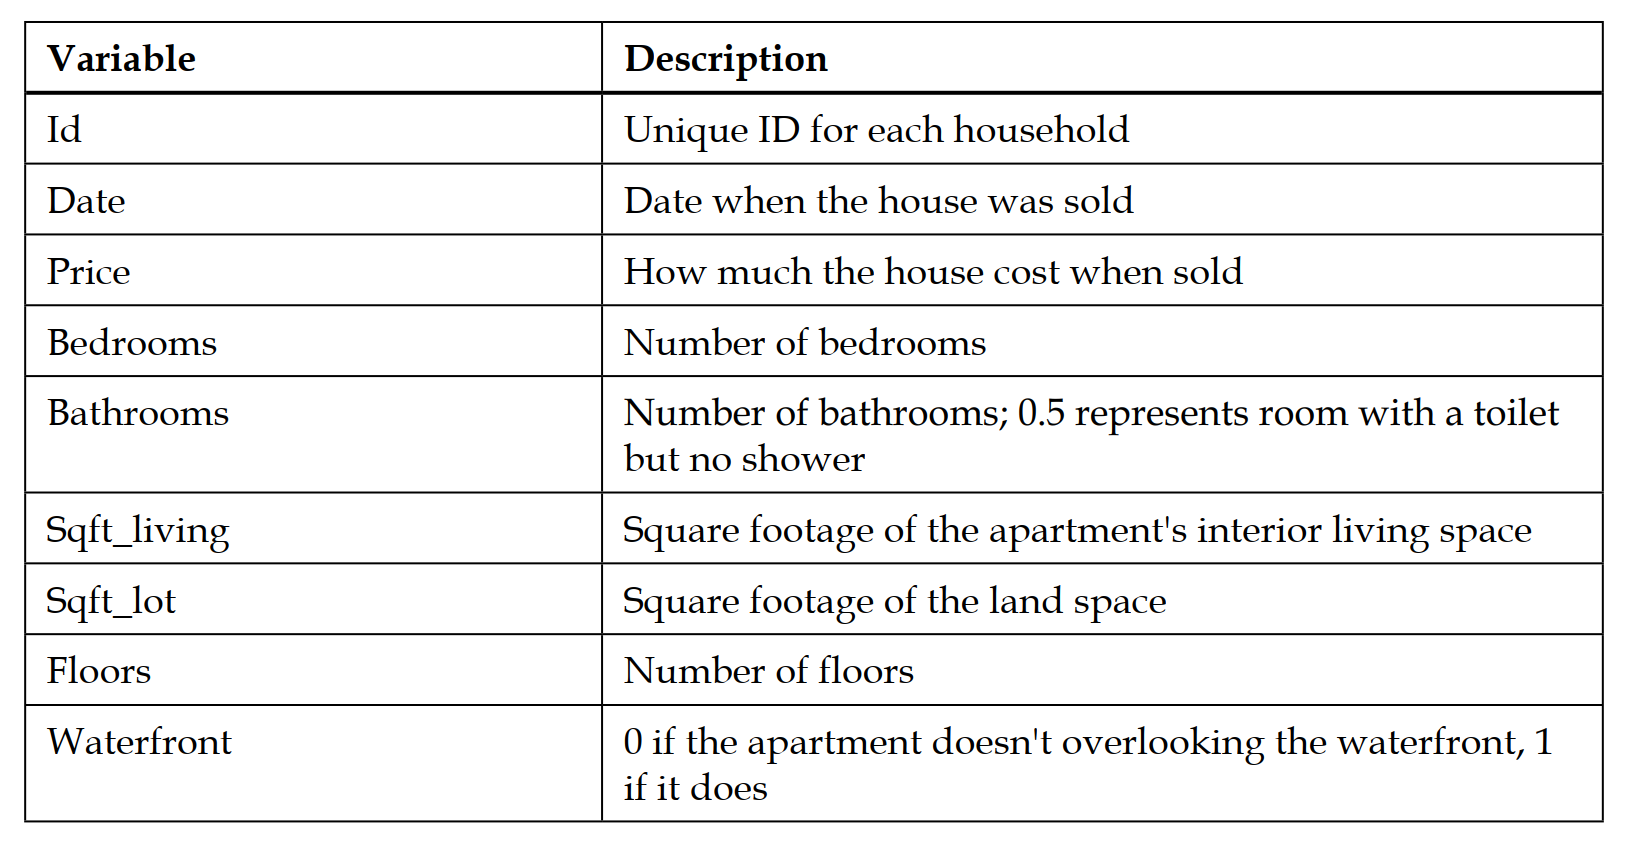

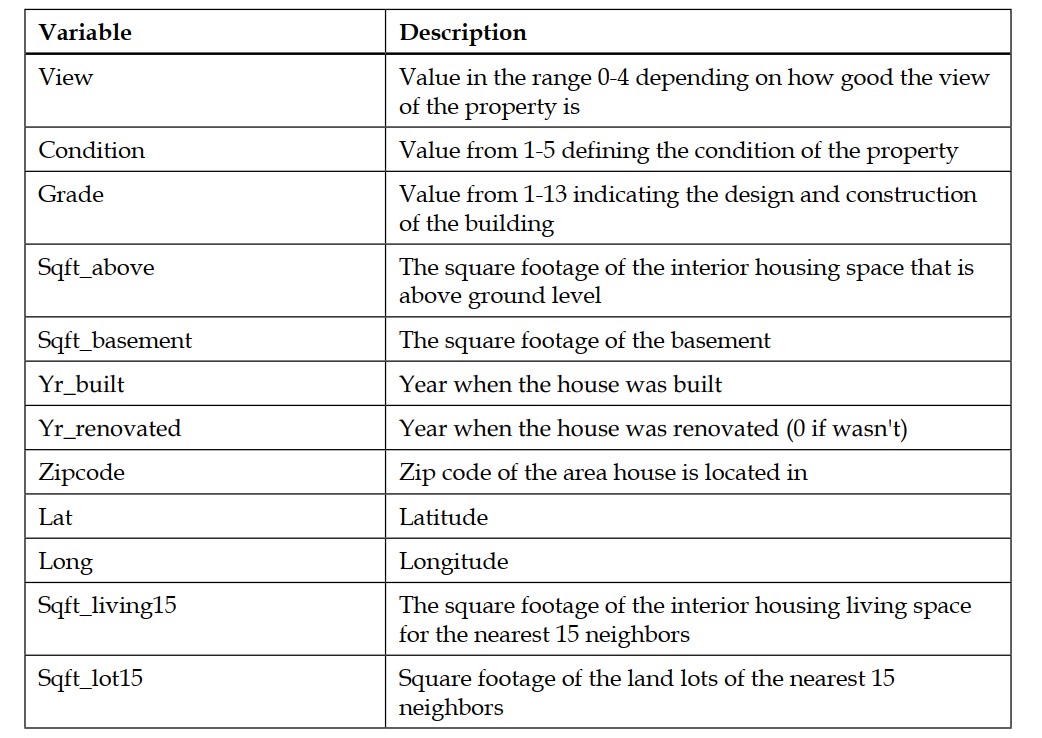

It turns out that from those 21 variables, only 18 count. That is because unique, category-like values do not have any impact on your prediction. That includes Id, Date, and Zipcode. Price is the target of your prediction, and therefore you should get rid of that from your variables as well. After all that, you have 17 independent variables.

Now that we have explained all the variables and decided which are relevant and which are not, you can go back to your code. You're going to exclude these unnecessary variables and split the dataset into the features and the target (in our case the target is price).

```
# Getting separately the features and the targets
X = dataset.iloc[:, 3:].values
X = X[:, np.r_[0:13,14:18]]
y = dataset.iloc[:, 2].values
```

In [3]:
# Getting separately the features and the targets
X = dataset.iloc[:, 3:].values
X = X[:, np.r_[0:13,14:18]]
y = dataset.iloc[:, 2].values

# Data preparation

Now that you've separated your important features and target, you can split your X and y into training and test sets. We do that with the following line:
```
# Splitting the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
```

In [4]:
# Splitting the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train[:5,1:3])

[[1.00e+00 1.57e+03]
 [2.50e+00 1.78e+03]
 [1.50e+00 1.09e+03]
 [2.50e+00 2.21e+03]
 [2.50e+00 1.80e+03]]


# Scaling data

Now you might be wondering why on earth you have to perform such an operation.
You already have the data, so why not build and train the neural network already?

There's a problem with that; if we leave the data as it is, you'll notice that your ANN does not learn. The reason for that is because different variables will impact your prediction more or less depending on their values.

## Scaling the features
```
xscaler = MinMaxScaler(feature_range = (0,1))
X_train = xscaler.fit_transform(X_train)
X_test = xscaler.transform(X_test)
```

In [5]:
xscaler = MinMaxScaler(feature_range = (0,1))
X_train = xscaler.fit_transform(X_train)
X_test = xscaler.transform(X_test)

## Scaling the target
```
yscaler = MinMaxScaler(feature_range = (0,1))
y_train = yscaler.fit_transform(y_train.reshape(-1,1))
y_test = yscaler.transform(y_test.reshape(-1,1))
```

In [6]:
print(y_train)

yscaler = MinMaxScaler(feature_range = (0,1))
y_train = yscaler.fit_transform(y_train.reshape(-1,1))
y_test = yscaler.transform(y_test.reshape(-1,1))

print(y_train.reshape(-1, 1))

[495000. 635000. 382500. ... 431000. 411000. 699900.]
[[0.05508197]
 [0.07344262]
 [0.04032787]
 ...
 [0.04668852]
 [0.04406557]
 [0.0819541 ]]


In [7]:
print(y_train)
print(y_test)

[[0.05508197]
 [0.07344262]
 [0.04032787]
 ...
 [0.04668852]
 [0.04406557]
 [0.0819541 ]]
[[0.02911475]
 [0.19711475]
 [0.06388197]
 ...
 [0.03868197]
 [0.0295082 ]
 [0.06569836]]


# Building the neural network

To build the neural network, you can use a highly reliable and easy to use library called Keras. Let's get straight into coding it:

```
model = Sequential()
model.add(Dense(units = 64, kernel_initializer = 'uniform',
activation = 'relu', input_dim = 17))
model.add(Dense(units = 16, kernel_initializer = 'uniform',
activation = 'relu'))
model.add(Dense(units = 1, kernel_initializer = 'uniform',
activation = 'relu'))
model.compile(optimizer = Adam(lr = 0.001), loss = 'mse',
metrics = ['mean_absolute_error'])
```

In [8]:
model = Sequential()
model.add(Dense(units = 64, kernel_initializer = 'uniform',
activation = 'relu', input_dim = 17))
model.add(Dense(units = 16, kernel_initializer = 'uniform',
activation = 'relu'))
model.add(Dense(units = 1, kernel_initializer = 'uniform',
activation = 'relu'))
model.compile(optimizer = Adam(learning_rate = 0.001), loss = 'mse',
metrics = ['mean_absolute_error'])

# Training the neural network

Now that you've built your model, you can finally train it!

```
model.fit(X_train, y_train, batch_size = 32, epochs = 100,
validation_data = (X_test, y_test))
```

In [9]:
model.fit(X_train, y_train, batch_size = 32, epochs = 100,
validation_data = (X_test, y_test))

Epoch 1/100
541/541 [==============================] - 2s 2ms/step - loss: 0.0011 - mean_absolute_error: 0.0196 - val_loss: 5.8642e-04 - val_mean_absolute_error: 0.0146
Epoch 2/100
541/541 [==============================] - 1s 2ms/step - loss: 6.4299e-04 - mean_absolute_error: 0.0157 - val_loss: 6.5027e-04 - val_mean_absolute_error: 0.0176
Epoch 3/100
541/541 [==============================] - 1s 2ms/step - loss: 6.1242e-04 - mean_absolute_error: 0.0154 - val_loss: 5.1244e-04 - val_mean_absolute_error: 0.0136
Epoch 4/100
541/541 [==============================] - 1s 3ms/step - loss: 5.6198e-04 - mean_absolute_error: 0.0148 - val_loss: 5.3597e-04 - val_mean_absolute_error: 0.0148
Epoch 5/100
541/541 [==============================] - 1s 2ms/step - loss: 5.6834e-04 - mean_absolute_error: 0.0149 - val_loss: 4.7473e-04 - val_mean_absolute_error: 0.0134
Epoch 6/100
541/541 [==============================] - 1s 2ms/step - loss: 5.2840e-04 - mean_absolute_error: 0.0144 - val_loss: 4.7424e-04 

541/541 [==============================] - 1s 2ms/step - loss: 2.7348e-04 - mean_absolute_error: 0.0102 - val_loss: 2.5361e-04 - val_mean_absolute_error: 0.0093
Epoch 49/100
541/541 [==============================] - 1s 2ms/step - loss: 2.6028e-04 - mean_absolute_error: 0.0100 - val_loss: 2.5510e-04 - val_mean_absolute_error: 0.0094
Epoch 50/100
541/541 [==============================] - 1s 2ms/step - loss: 2.6339e-04 - mean_absolute_error: 0.0100 - val_loss: 2.4339e-04 - val_mean_absolute_error: 0.0093
Epoch 51/100
541/541 [==============================] - 1s 2ms/step - loss: 2.6530e-04 - mean_absolute_error: 0.0101 - val_loss: 2.4044e-04 - val_mean_absolute_error: 0.0094
Epoch 52/100
541/541 [==============================] - 1s 2ms/step - loss: 2.5518e-04 - mean_absolute_error: 0.0100 - val_loss: 2.5775e-04 - val_mean_absolute_error: 0.0097
Epoch 53/100
541/541 [==============================] - 1s 2ms/step - loss: 2.6136e-04 - mean_absolute_error: 0.0101 - val_loss: 2.9452e-04 - v

541/541 [==============================] - 1s 2ms/step - loss: 2.3643e-04 - mean_absolute_error: 0.0096 - val_loss: 2.3152e-04 - val_mean_absolute_error: 0.0090
Epoch 96/100
541/541 [==============================] - 1s 3ms/step - loss: 2.3337e-04 - mean_absolute_error: 0.0096 - val_loss: 2.2863e-04 - val_mean_absolute_error: 0.0091
Epoch 97/100
541/541 [==============================] - 1s 2ms/step - loss: 2.3660e-04 - mean_absolute_error: 0.0096 - val_loss: 2.3021e-04 - val_mean_absolute_error: 0.0091
Epoch 98/100
541/541 [==============================] - 1s 3ms/step - loss: 2.2717e-04 - mean_absolute_error: 0.0095 - val_loss: 2.3484e-04 - val_mean_absolute_error: 0.0093
Epoch 99/100
541/541 [==============================] - 2s 3ms/step - loss: 2.3586e-04 - mean_absolute_error: 0.0097 - val_loss: 2.4987e-04 - val_mean_absolute_error: 0.0095
Epoch 100/100
541/541 [==============================] - 2s 3ms/step - loss: 2.2650e-04 - mean_absolute_error: 0.0095 - val_loss: 2.2925e-04 - 

# Displaying results
```
# Making predictions on the test set while reversing the scaling
y_test = yscaler.inverse_transform(y_test)
prediction = yscaler.inverse_transform(model.predict(X_test))

# Computing the error rate
error = abs(prediction - y_test)/y_test
print(np.mean(error))
```

In [10]:
# Making predictions on the test set while reversing the scaling
y_test = yscaler.inverse_transform(y_test)
prediction = yscaler.inverse_transform(model.predict(X_test))

# Computing the error rate
error = abs(prediction - y_test)/y_test
print(np.mean(error))

136/136 [==============================] - 0s 2ms/step
0.1510618422363247


# Results visualization
```
import matplotlib.pyplot as plt 

plt.plot(y_test,prediction, color='r', label='sin') 

plt.xlabel("True") 
plt.ylabel("Predict") 
plt.legend() 
plt.show() 
```

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


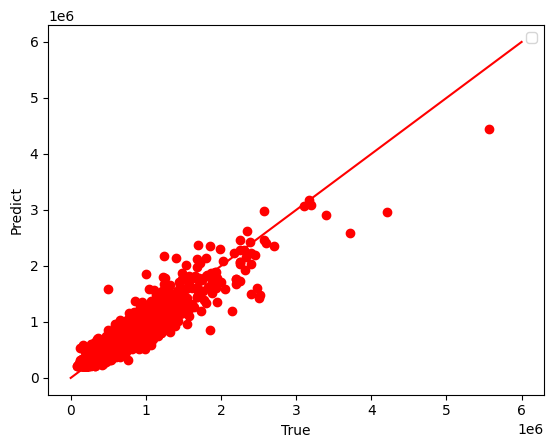

In [11]:
import matplotlib.pyplot as plt

plt.scatter(y_test,prediction, color='r')
plt.plot([0,6e6],[0,6e6], color='r')

plt.xlabel("True")
plt.ylabel("Predict")
plt.legend()
plt.show()